<a href="https://colab.research.google.com/github/hamagami/preprocess/blob/main/06_01_pizza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import urllib.request 
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
url = "https://dl.dropbox.com/s/ttng1f37eesou74/pizza_v1.csv"
urllib.request.urlretrieve(url, 'pizza_v1.csv') 

('pizza_v1.csv', <http.client.HTTPMessage at 0x7f8c164c6210>)

In [ ]:
df= pd.read_csv("pizza_v1.csv")

In [ ]:
df

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,"Rp235,000",22.0,chicken,double_signature,jumbo,yes,yes
1,A,"Rp198,000",20.0,papperoni,double_signature,jumbo,yes,yes
2,A,"Rp120,000",16.0,mushrooms,double_signature,reguler,yes,yes
3,A,"Rp155,000",14.0,smoked beef,double_signature,reguler,yes,no
4,A,"Rp248,000",18.0,mozzarella,double_signature,jumbo,yes,no
...,...,...,...,...,...,...,...,...
124,E,"Rp39,000",8.5,tuna,spicy tuna,small,yes,yes
125,E,"Rp72,000",12.0,tuna,spicy tuna,medium,yes,yes
126,E,"Rp99,000",14.0,tuna,spicy tuna,large,yes,yes
127,E,"Rp44,000",8.5,meat,BBQ_meat_fiesta,small,yes,no


In [ ]:
df.describe()

,diameter
count,129.000000
mean,12.976744
std,3.272674
min,8.000000
25%,12.000000
50%,12.000000
75%,14.000000
max,22.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company       129 non-null    object 
 1   price_rupiah  129 non-null    object 
 2   diameter      129 non-null    float64
 3   topping       129 non-null    object 
 4   variant       129 non-null    object 
 5   size          129 non-null    object 
 6   extra_sauce   129 non-null    object 
 7   extra_cheese  129 non-null    object 
dtypes: float64(1), object(7)
memory usage: 8.2+ KB


In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Modules for ML
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#Regression classes
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
%matplotlib inline

ルピアの表記をとって数値型にして、わかりやすいように円にする　１ルピア＝0.0075

In [ ]:
df['price_yen'] = df['price_rupiah'].str.replace('\D+','',regex=True)
df['price_yen'] = pd.to_numeric(df['price_yen'])*0.0075
df=df.drop('price_rupiah',axis=1)
df['price_yen'].dtype

dtype('float64')

In [ ]:
df

,company,diameter,topping,variant,size,extra_sauce,extra_cheese,price_yen
0,A,22.0,chicken,double_signature,jumbo,yes,yes,1762.5
1,A,20.0,papperoni,double_signature,jumbo,yes,yes,1485.0
2,A,16.0,mushrooms,double_signature,reguler,yes,yes,900.0
3,A,14.0,smoked beef,double_signature,reguler,yes,no,1162.5
4,A,18.0,mozzarella,double_signature,jumbo,yes,no,1860.0
...,...,...,...,...,...,...,...,...
124,E,8.5,tuna,spicy tuna,small,yes,yes,292.5
125,E,12.0,tuna,spicy tuna,medium,yes,yes,540.0
126,E,14.0,tuna,spicy tuna,large,yes,yes,742.5
127,E,8.5,meat,BBQ_meat_fiesta,small,yes,no,330.0


価格の部分をヒストグラム

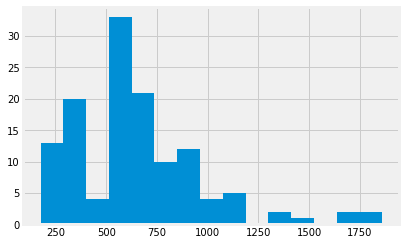

In [ ]:
#sns.histplot(data=df[['price_rupiah']],x='price_rupiah')
plt.hist(df['price_yen'],bins=15)
plt.show()

カテゴリカルデータだけを取り出してエンコードする

In [ ]:
cols_to_encode = df.drop(['diameter','price_yen'],axis=1).columns
cols_to_encode

Index(['company', 'topping', 'variant', 'size', 'extra_sauce', 'extra_cheese'], dtype='object')

単純なone-hotエンコーディング
drop_first は　すべて０の場合も１つのラベルに割り当てる設定 k個の属性に対して k-1次元の属性で表現する

In [ ]:
dummies = pd.get_dummies(df[cols_to_encode],drop_first=True)
dummies.shape

(129, 41)

In [ ]:
dummies.head()

,company_B,company_C,company_D,company_E,topping_black papper,topping_chicken,topping_meat,topping_mozzarella,topping_mushrooms,topping_onion,topping_papperoni,topping_sausage,topping_smoked beef,topping_tuna,topping_vegetables,variant_BBQ_sausage,variant_american_classic,variant_american_favorite,variant_classic,variant_crunchy,variant_double_decker,variant_double_mix,variant_double_signature,variant_extravaganza,variant_gournet_greek,variant_italian_veggie,variant_meat_eater,variant_meat_lovers,variant_neptune_tuna,variant_new_york,variant_spicy tuna,variant_spicy_tuna,variant_super_supreme,variant_thai_veggie,size_jumbo,size_large,size_medium,size_reguler,size_small,extra_sauce_yes,extra_cheese_yes
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


数値データだけを取り出す

In [ ]:
df.drop(cols_to_encode,axis=1,inplace=True)
df.head()

,diameter,price_yen
0,22.0,1762.5
1,20.0,1485.0
2,16.0,900.0
3,14.0,1162.5
4,18.0,1860.0


diameter を 正規化

In [ ]:
cols_to_scale = ['diameter']
scale = MinMaxScaler()
scalled = scale.fit_transform(df[cols_to_scale])

(array([26.,  0., 49., 24.,  9., 11.,  7.,  3.]),
 array([0.   , 0.125, 0.25 , 0.375, 0.5  , 0.625, 0.75 , 0.875, 1.   ]),
 <a list of 8 Patch objects>)

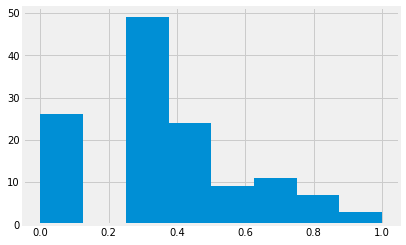

In [ ]:
plt.hist(scalled,bins=8)

In [ ]:
df['diameter'] = scalled[:,0]

In [ ]:
df[cols_to_scale].describe()

,diameter
count,129.000000
mean,0.355482
std,0.233762
min,0.000000
25%,0.285714
50%,0.285714
75%,0.428571
max,1.000000


正規化した数量データとエンコードしてカテゴリカルデータを結合

In [ ]:
new_df = pd.concat([dummies,df],axis=1)
new_df.shape

(129, 43)

目的変数yは価格、それ以外を説明変数xとして分離

In [ ]:
x,y = new_df.drop('price_yen',axis=1),df['price_yen']
x.shape,y.shape

((129, 42), (129,))

学習データのサンプリング

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((90, 42), (39, 42), (90,), (39,))

In [ ]:
x_train

,company_B,company_C,company_D,company_E,topping_black papper,topping_chicken,topping_meat,topping_mozzarella,topping_mushrooms,topping_onion,topping_papperoni,topping_sausage,topping_smoked beef,topping_tuna,topping_vegetables,variant_BBQ_sausage,variant_american_classic,variant_american_favorite,variant_classic,variant_crunchy,variant_double_decker,variant_double_mix,variant_double_signature,variant_extravaganza,variant_gournet_greek,variant_italian_veggie,variant_meat_eater,variant_meat_lovers,variant_neptune_tuna,variant_new_york,variant_spicy tuna,variant_spicy_tuna,variant_super_supreme,variant_thai_veggie,size_jumbo,size_large,size_medium,size_reguler,size_small,extra_sauce_yes,extra_cheese_yes,diameter
10,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0.750000
59,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0.285714
70,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0.035714
48,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0.285714
128,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0.428571
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0.428571
34,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0.285714
113,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0.285714


# 学習モデル
様々な学習モデルをつかって学習させてみる

In [ ]:
models = [LinearRegression(),Ridge(),Lasso(),DecisionTreeRegressor(),RandomForestRegressor(),SVR(),KNeighborsRegressor(),MLPRegressor()]

In [ ]:
mean_scores = []

for model in models:
    print("Model:",model)
    cv_score = cross_val_score(model,x,y,cv=5)
    print("CV scores:",cv_score)
    mean_score = cv_score.mean()
    print("Mean Score:",mean_score)
    print('\n')
    mean_scores.append(mean_score)

Model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
CV scores: [-5.01280584e+24 -3.40228525e+22 -6.69814992e+25  8.36070740e-01
 -2.58175341e+25]
Mean Score: -1.956917239746132e+25


Model: Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
CV scores: [0.59174188 0.65289556 0.65235731 0.84976629 0.63196046]
Mean Score: 0.6757443015472093


Model: Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
CV scores: [0.60927958 0.6959945  0.80215388 0.89048218 0.66054521]
Mean Score: 0.7316910681152207


Model: DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      m

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


CV scores: [-5.02480464 -6.45649436 -5.63993235 -3.10513367 -6.73983712]
Mean Score: -5.393240426437776




/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
mean_scores = np.array(mean_scores)

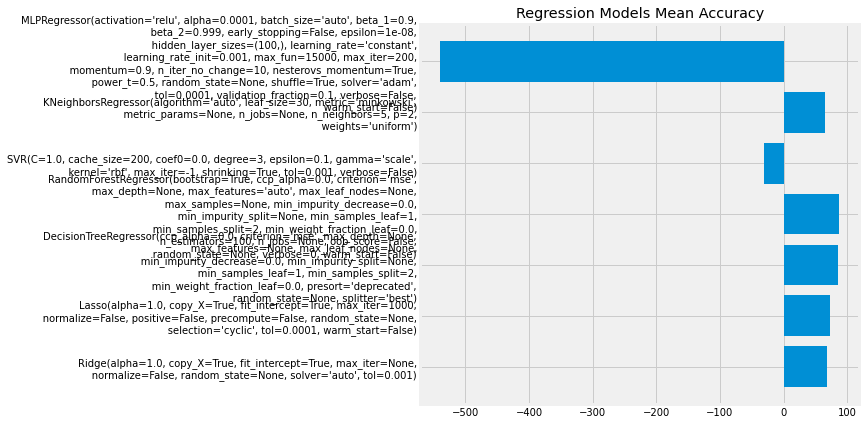

In [ ]:
plt.figure(figsize=(7,7))
plt.barh(range(7),mean_scores[1:]*100)
plt.title('Regression Models Mean Accuracy')
plt.yticks(range(7),models[1:])
plt.show()

In [ ]:
rf_model = RandomForestRegressor()
rf_model.fit(x_train,y_train)
rf_model.score(x_test,y_test)

0.9340541733164399

In [ ]:
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train,y_train)
dt_model.score(x_test,y_test)

0.9778138222849083

In [ ]:
def predict(model,x):
    pred = model.predict(x)
    return pred

def actual_vs_predicted(label,y_true,y_pred,title=None):
    ap = pd.DataFrame({f'{label} Actual':y_true,f'{label} Predicted':y_pred})
    
    plt.figure(figsize=(7,7))
    sns.scatterplot(data=ap, x=f'{label} Actual', y=f'{label} Predicted')
    plt.title(title)
    plt.show()

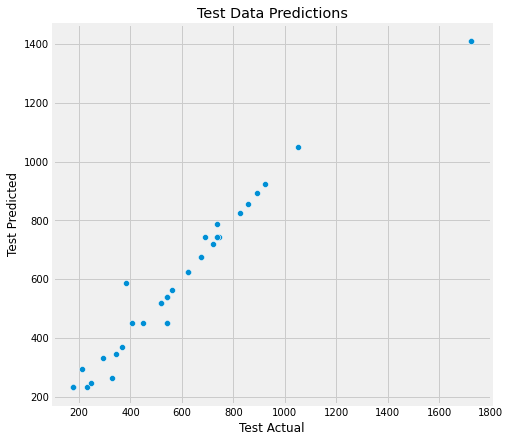

In [ ]:
y_test_pred = predict(dt_model,x_test)

actual_vs_predicted('Test',y_test,y_test_pred,'Test Data Predictions')

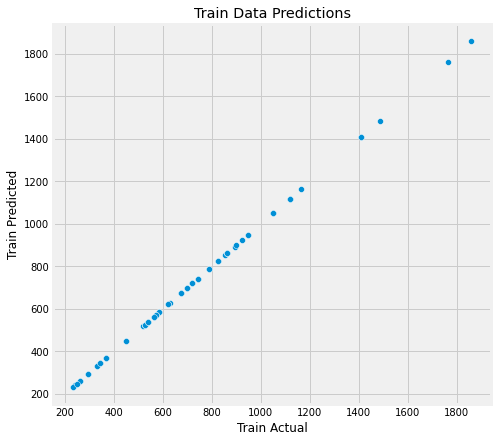

In [ ]:
y_train_pred = predict(dt_model,x_train)

actual_vs_predicted('Train',y_train,y_train_pred,'Train Data Predictions')